Obtendo dados de ocorrências...
     cisp  roubo_veiculo  recuperacao_veiculos
0       1            548                   527
1       4           2133                  1872
2       5           1253                  1513
3       6           4332                  7768
4       7           1970                  1778
..    ...            ...                   ...
133   159            279                   322
134   165            500                   621
135   166            965                  1444
136   167            104                   386
137   168             59                   159

[138 rows x 3 columns]
Dados obtidos com sucesso!
Obtendo dados de ocorrências...
Correlação entre roubo de veículos e recuperação de veículos:  0.9305805299331205


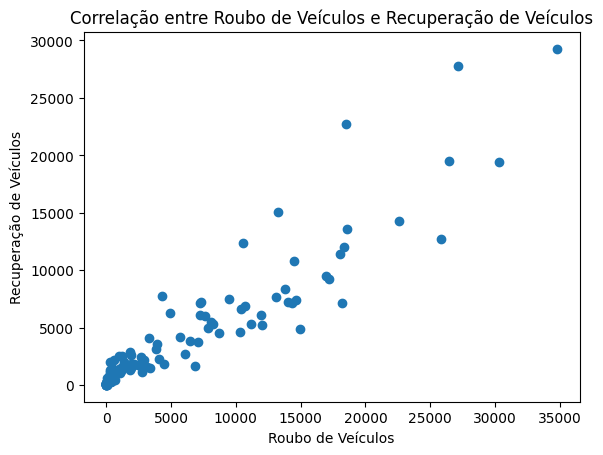

Score:  0.8784527330939058
Score do modelo de regressão linear:  0.8784527330939058


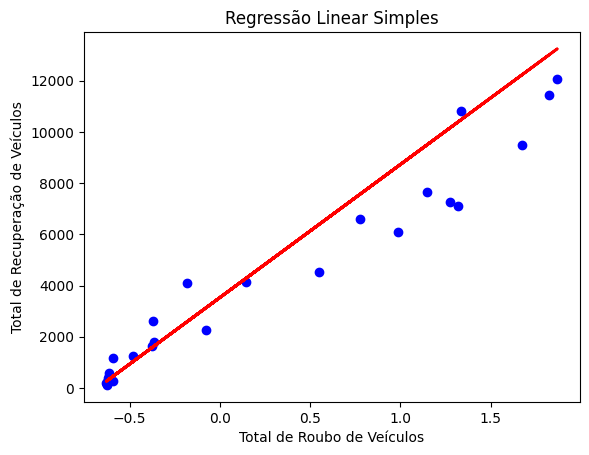

Previsão de recuperação de veículos:  [[283049.9846101 ]
 [353752.00454394]
 [424454.02447778]]
Correlação entre roubo de veículos e recuperação de veículos:  0.9305805299331205


In [3]:
# pip install pandas numpy matplotlib scikit-learn seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Constante do Endereço dos dados
#ENDERECO_DADOS = 'https://www.ispdados.rj.gov.br/Arquivos/BaseDPEvolucaoMensalCisp.csv'
ENDERECO_DADOS = r'./dados/BaseDPEvolucaoMensalCisp.csv'

# obter dados do CSV e do MySQL
try:
    print('Obtendo dados de ocorrências...')

    df_ocorrencias = pd.read_csv(ENDERECO_DADOS, sep=';', encoding='iso-8859-1')

    # filtrar ano de 2021 a 2023
    # df_ocorrencias = df_ocorrencias[(df_ocorrencias['ano'] >= 2020) & (df_ocorrencias['ano'] <= 2023)]

    # delimitar somente as variáveis necessárias
    df_veiculos = df_ocorrencias[['cisp','roubo_veiculo','recuperacao_veiculos']]

    #totalizar
    df_total_veiculos = df_veiculos.groupby('cisp').sum(['roub_veiculo','recuperacao_veiculos']).reset_index()

    print(df_total_veiculos)

    print('Dados obtidos com sucesso!')
except Exception as e:
    print('Erro ao obter dados: ', e)


try:
    print('Obtendo dados de ocorrências...')

    array_roubo_de_veiculos = np.array(df_total_veiculos['roubo_veiculo'])
    array_recuperacao_de_veiculos = np.array(df_total_veiculos['recuperacao_veiculos'])

    correlacao = np.corrcoef(array_roubo_de_veiculos, array_recuperacao_de_veiculos)[0, 1]
    print('Correlação entre roubo de veículos e recuperação de veículos: ', correlacao)

    # plotar gráfico
    plt.scatter(array_roubo_de_veiculos, array_recuperacao_de_veiculos)
    plt.xlabel('Roubo de Veículos')
    plt.ylabel('Recuperação de Veículos')
    plt.title('Correlação entre Roubo de Veículos e Recuperação de Veículos')
    plt.show()
except Exception as e:
    print('Erro ao correlacionar: ', e)

# regressao linear simples
try:
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import StandardScaler

    # dividir dados em treinamento e teste
    X_train, X_test, y_train, y_test = train_test_split(
        array_roubo_de_veiculos,  # variavel independente
        array_recuperacao_de_veiculos,  # variável dependente
        test_size=0.2,  # tamanho do teste
        random_state=42
    )

    # normalização da escala dos dados
    X_train = X_train.reshape(-1, 1)
    X_test = X_test.reshape(-1, 1)
    y_train = y_train.reshape(-1, 1)
    y_test = y_test.reshape(-1, 1)

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # importar modelo de regressão linear
    # responsável pela criação da funlção linear.
    from sklearn.linear_model import LinearRegression

    # instanciar modelo
    # criar modelo de regressão linear
    modelo = LinearRegression()

    # treinar modelo
    modelo.fit(X_train, y_train)

    r2_score = modelo.score(X_test, y_test)
    print('Score: ', r2_score)

    # fazer previsão
    y_pred = modelo.predict(X_test)

    # avaliar modelo
    score = modelo.score(X_test, y_test)
    print('Score do modelo de regressão linear: ', score)

    # plotar gráfico
    plt.scatter(X_test, y_test, color='blue')
    plt.plot(X_test, y_pred, color='red', linewidth=2)
    plt.xlabel('Total de Roubo de Veículos')
    plt.ylabel('Total de Recuperação de Veículos')
    plt.title('Regressão Linear Simples')
    plt.show()

    array_roubo_de_veiculos_pred = np.array([400000, 500000, 600000])
    array_roubo_de_veiculos_pred_scaled = scaler.transform(array_roubo_de_veiculos_pred.reshape(-1, 1))
    array_recuperacao_de_veiculos_pred = modelo.predict(array_roubo_de_veiculos_pred_scaled)
    print('Previsão de recuperação de veículos: ', array_recuperacao_de_veiculos_pred)
except Exception as e:
    print('Erro ao realizar a análise preditiva: ', e)